# EDA with 2 Variables

Not all data sets have a single numeric variable. We have threee possible configurations of the 2-variable setting:
- 2 category variables
- 2 numeric variables
- 1 numeric variable with 1 category variable

## Category Variables

With 2 category variables we wish to perform a cross-tabulation with **xtabs**, and we can visualize the scenario with a **mosaic plot**.

### Example 1: Narcissism vs. Accept Date

The AccDate question is as follows: "At a time in your life when you are not romantically involved with anyone, a person asks you out. You believe this person has a wonderful personality, but you do not find this person physically attractive. Do you accept the date?" The responses are Yes/No. 

**Research Question:** Do Y/N responses to AccDate question vary based upon biological sex?

In [1]:
pers <- read.csv('https://faculty.ung.edu/rsinn/data/personality.csv')
narc <- pers[ , c('AccDate','Sex')]

```{sidebar}
We have a statistical formula of $\sim A + B$ where the addition symbol indicates to R that a category variable follows.
```

Let's conduct a cross-tabulation of these two categorical variables.

In [2]:
xtabs(~AccDate+Sex, data = narc)

       Sex
AccDate  F  M
      N 28 28
      Y 46 27

**Analysis.** We see that the proportion of Yes/No responses is roughly equal for biological males (28/27), yet for biological females the responses favor "yes" (46/27). Hence, we have evidence for a difference in response to the question based upon biological sex of the respondant.

Let's construct a **mosaicplot()** next to visualize the situation.

```{tip}
Note that we employ the same statistical formula in the mosaicplot() function as we did with xtabs().
```

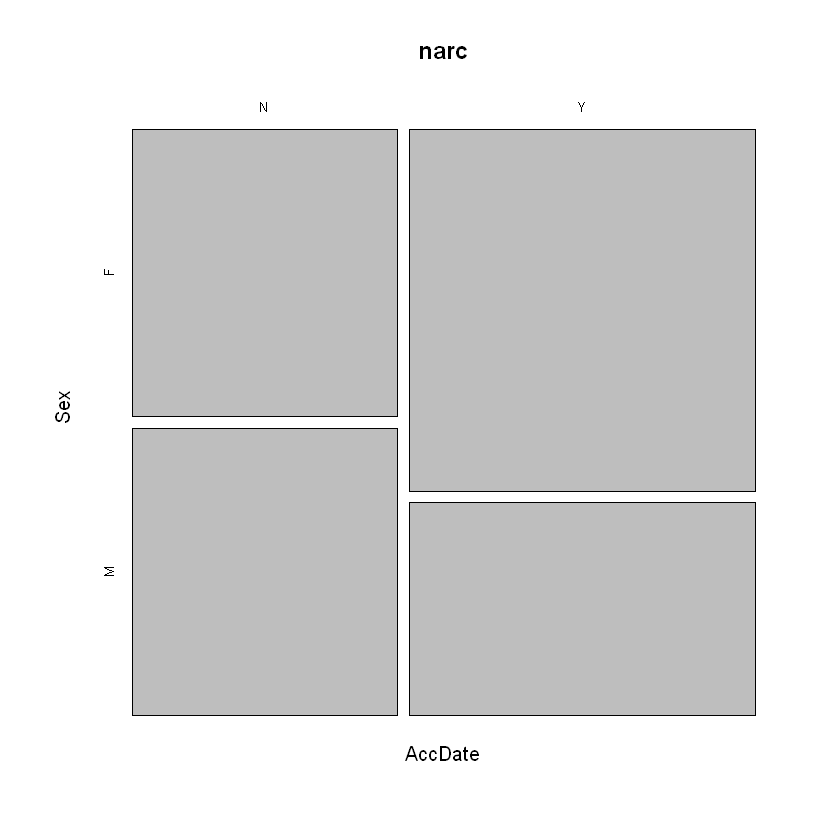

In [3]:
mosaicplot(~AccDate+Sex, data = narc)

The analysis does not change. The visualization confirms a higher percentage of "yes" responses from biological females. This signals that the variable

<center><span style="color:blue;font-weight:bold">AccDate may be dependent upon Sex</span>.</center>

## Example 2: Adult Playfulness vs. Optimism

The variable **adult playfulness** indicates adults who have child-like qualities and who often excel at relating to children. These individuals may enjoy splashing through puddles, whistling, dancing or dressing up (or dressing down) just for fun. You can read more about adult playfulness in [Psychology Today](https://www.psychologytoday.com/us/blog/having-fun/201507/the-playful-adult).

Does the playfulness quality correspond to Optimism?

Let gather a subset from our **personality** data frame and construct a linear model to find out.

In [4]:
opt <- pers[ , c('Play', 'Opt')]

```{tip}
To add the **line of best fit** to the scatter plot, we must use the linear models function **lm()**. We create the linear model for **Play vs. Opt**, and we extract the line of best fit from the model using **abline()**.
```

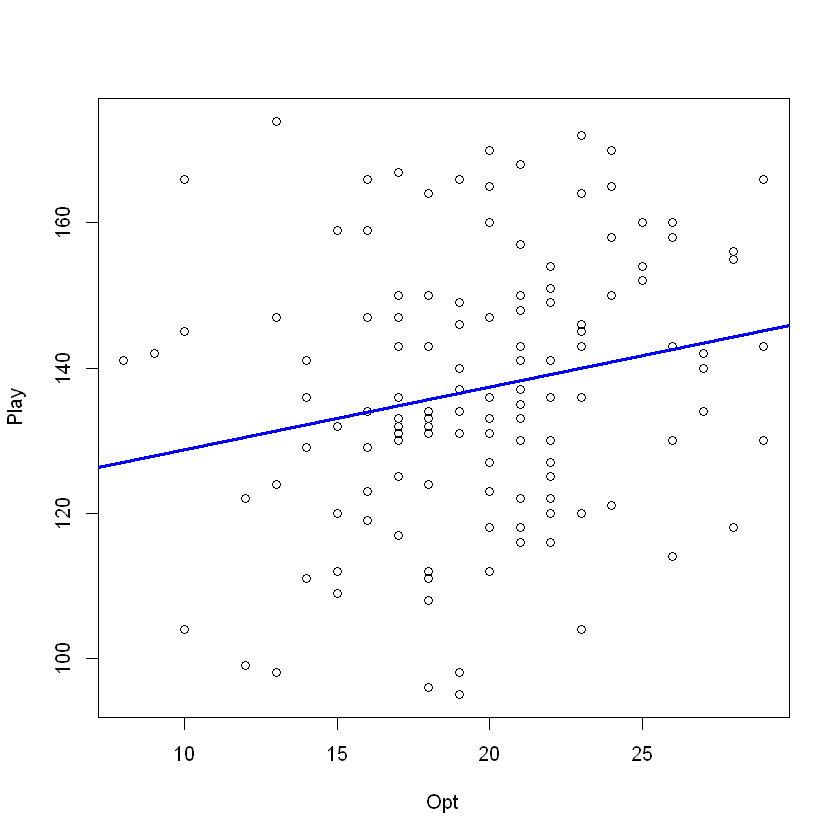

In [5]:
mod <- lm(Play ~ Opt, data = opt)  ## Creating linear model
plot(Play ~ Opt, data = opt)       ## Producing scatter plot
abline(mod, lwd = 3, col = 'blue') ## Adding line of best fit from model

**Analysis.** For scatter plots, the line of best fit will be perfectly horizontal or flat if **no correlation at all** exists. If some linear relationship is present, the slope of the line of best fit will be significantly different from zero. Here, we see a significant positive slope and thus expect to find a positive linear correlation between **playfulness** and **optimism**.

## Example #: Perfectionism vs. Preferred Seat in Class

The **SitClass** variable provides a response the question: "You arrive in your classroom when almost no one is present, so almost every seat in the class is open. Do you prefer to sit in front, middle or back?

**Research Question.** Does class seating preference vary based upon a student's level of **perfectionism**?

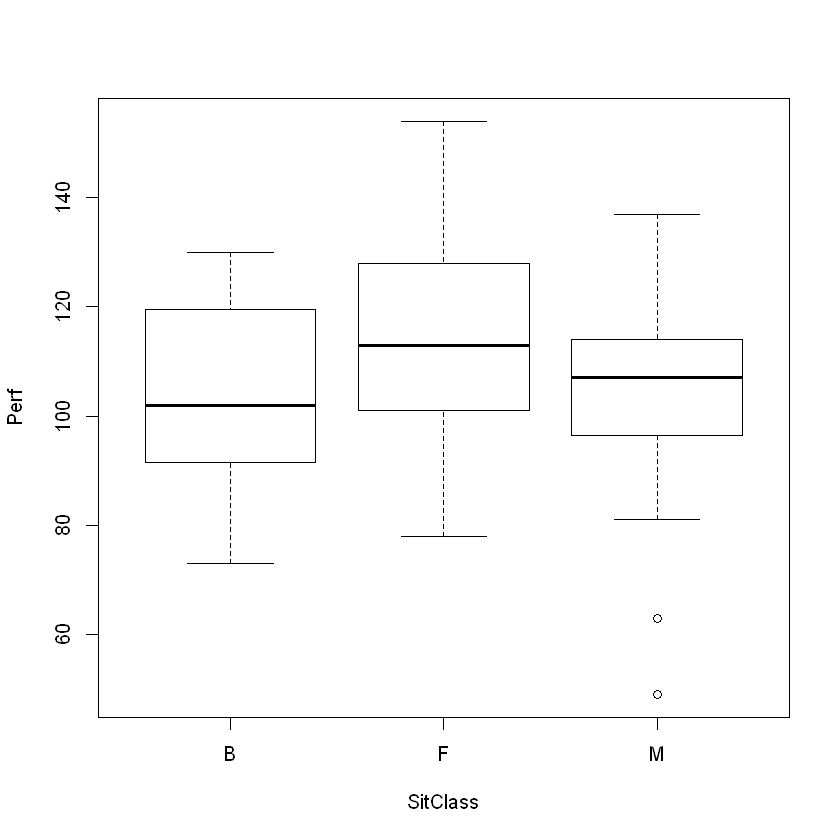

In [6]:
perf <- pers[ , c('Perf','SitClass')]
boxplot(Perf ~ SitClass, data = perf)

**Analysis.** Some variation due to **Perfectionism** appears to exist due to seating preferences.
- Those preferring the front have the highest perfectionism scores.
- Those preferring the back have the lowest perfectionishm scores.

Those who prefer seats in the middle of the classroom are in between, but outliers are present. A statistical test (ANOVA) would be quite useful and helpful, here, as it would help us parse the differences in perfectionism based upon seating preference.